PARTIAL PLOTS

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay




In [208]:
df = pd.read_csv('FIFA 2018 Statistics.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [209]:
y = (df['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
X = df[feature_names]

In [210]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [211]:
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
tree_graph = graphviz.Source(tree_graph)

Partial Dependence Plot

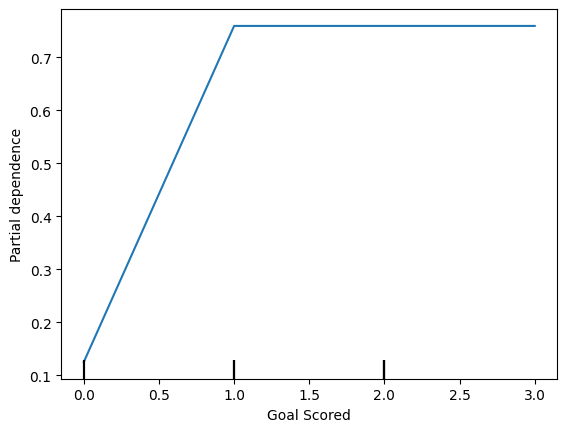

In [212]:
display_1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])


Observations


From this particular graph, we see that scoring a goal substantially increases your chances of winning "Man of The Match." But extra goals beyond that appear to have little impact on predictions.

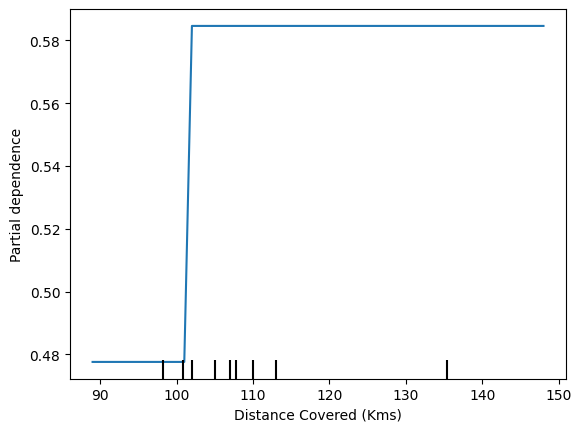

In [213]:
feature_to_plot = 'Distance Covered (Kms)'
display_2 = PartialDependenceDisplay.from_estimator(tree_model, val_X, [feature_to_plot])

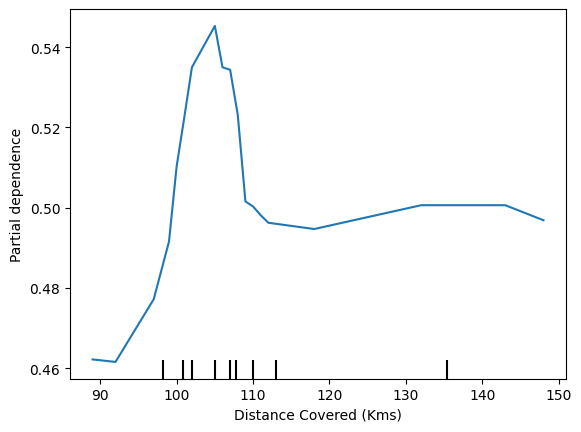

In [214]:
#buildings the random forest model
rf_model = RandomForestClassifier(random_state=1).fit(train_X, train_y)
display_3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [feature_to_plot])

Obseravtions

This model thinks you are more likely to win Man of the Match if your players run a total of 100km over the course of the game. Though running much more causes lower predictions.

2D Partial Dependence Plots

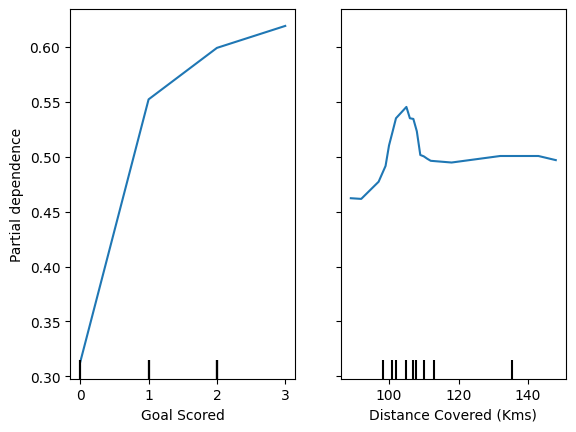

In [215]:
#creating a 2D plot of the partial dependence
display_4 = PartialDependenceDisplay.from_estimator(rf_model, val_X, ['Goal Scored', 'Distance Covered (Kms)'])


SHAP VALUES

In [216]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

rf_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.25, 0.75]])

In [217]:
import shap  # package used to calculate Shap values

explainer = shap.TreeExplainer(rf_model)
shape_values = explainer.shap_values(data_for_prediction)

In [218]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shape_values[1], data_for_prediction)

Obseravtion

We predicted 0.75, whereas the base_value is 0.502. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Goal Scored being 2. Though the ball possession value has a meaningful effect decreasing the prediction.
